In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
%matplotlib inline

In [2]:
# path to data folder
data_path = "/home/jp_capo_98/Documents/ML-Silent-Speech-Recognition/Data/images/"
data_channels = ["ch1", "ch2", "ch3", "ch4"]

In [3]:
# import filenames and labels
data = {"label":[], "ch1":[], "ch2":[], "ch3":[], "ch4":[]}
for folder in os.listdir(data_path):
    for file in os.listdir(data_path + folder + "/" + data_channels[0]):
        data["label"].append(folder)
        data["ch1"].append(data_path + folder + "/" + data_channels[0] + "/" + file)
        data["ch2"].append(data_path + folder + "/" + data_channels[1] + "/" + file)
        data["ch3"].append(data_path + folder + "/" + data_channels[2] + "/" + file)
        data["ch4"].append(data_path + folder + "/" + data_channels[3] + "/" + file)

In [4]:
# convert to dataframe for easier visualization
data_df = pd.DataFrame(data)

In [5]:
# sample data
data_df.sample(4)

,ch1,ch2,ch3,ch4,label
252,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one
1434,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two
853,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one
326,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one


In [6]:
# describe the data
data_df.groupby("label").describe()

ch1                                                                 \
      count unique                                                top freq   
label                                                                        
one    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1   
two    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1   

        ch2                                                                 \
      count unique                                                top freq   
label                                                                        
one    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1   
two    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1   

        ch3                                                                 \
      count unique                                                top freq   
label                                                                        
one    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1   
two    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1   

        ch4                                                                 
      count unique                                                top freq  
label                                                                       
one    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1  
two    1017   1017  /home/jp_capo_98/Documents/ML-Silent-Speech-Re...    1

In [7]:
# one hot encoding dictionary
one_hot_encoding = {"one":[1, 0],
                   "two":[0, 1]}

In [8]:
# one hot decoding dictionary for argmax
one_hot_decoding = {0:"one",
                   1:"two"}

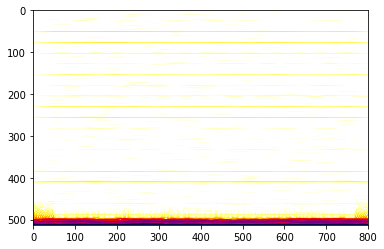

In [9]:
# Show one of the train spectograms
sample = data_df.sample()
plt.imshow(skimage.io.imread(sample.ch4.iloc[0]))

In [10]:
# Show sample label
sample.label.iloc[0]

'two'

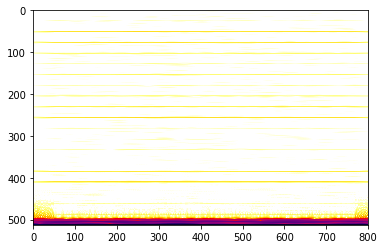

In [11]:
# Show one of the train spectograms
sample = data_df.sample()
plt.imshow(skimage.io.imread(sample.ch4.iloc[0]))

In [12]:
# Show sample label
sample.label.iloc[0]

'one'

In [13]:
# get shape
skimage.io.imread(sample.ch1.iloc[0]).shape

(513, 800, 3)

In [14]:
# shufle data frame to make diferent datasets
shuffled_df = data_df.sample(frac=1).reset_index(drop=True)
shuffled_df.head()

,ch1,ch2,ch3,ch4,label
0,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one
1,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two
2,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one
3,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two
4,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two


In [15]:
shuffled_df.shape

(2034, 5)

In [16]:
labels = np.array([one_hot_encoding[val] for val in shuffled_df.label.values])
labels[0]

array([1, 0])

### Separating data
- train = 80%
- validation = 10%
- test = 10%

In [17]:
# training data
train_data_labels = labels[:1628]
train_data_ch1 = shuffled_df.ch1.values[:1628]
train_data_ch2 = shuffled_df.ch2.values[:1628]
train_data_ch3 = shuffled_df.ch3.values[:1628]
train_data_ch4 = shuffled_df.ch4.values[:1628]

In [18]:
# validation data
validation_data_labels = labels[1628:1832]
validation_data_ch1 = shuffled_df.ch1.values[1628:1832]
validation_data_ch2 = shuffled_df.ch2.values[1628:1832]
validation_data_ch3 = shuffled_df.ch3.values[1628:1832]
validation_data_ch4 = shuffled_df.ch4.values[1628:1832]

In [19]:
# test data 
test_data_labels = labels[1832:]
test_data_ch1 = shuffled_df.ch1.values[1832:]
test_data_ch2 = shuffled_df.ch2.values[1832:]
test_data_ch3 = shuffled_df.ch3.values[1832:]
test_data_ch4 = shuffled_df.ch4.values[1832:]

### Helper functions

In [20]:
# weight initialization helper function
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return(tf.Variable(init_random_dist))

In [21]:
# bias initialization function
def init_bias(shape):
    init_bias_vals = tf.constant(0.1,  shape=shape)
    return (tf.Variable(init_bias_vals))

In [22]:
# 2d convolutional layer
def conv2d(x, W):
    return (tf.nn.conv2d(x, W, strides=[1,1,1,1], padding="SAME"))

In [23]:
# max pool layer
def max_pool_2by2(x):
    return (tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME"))

In [24]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return (tf.nn.relu(conv2d(input_x, W)+b))

In [25]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return (tf.nn.relu(tf.matmul(input_layer, W)+b))

In [26]:
def output_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return (tf.matmul(input_layer, W)+b)

## GRAPH

### Placeholders

In [27]:
with tf.name_scope("Inputs"):
    # getting images
    ch1_input = tf.placeholder(tf.float32, shape=[None, 160, 250, 3], name="ch1_input")
    ch2_input = tf.placeholder(tf.float32, shape=[None, 160, 250, 3], name="ch2_input")
    ch3_input = tf.placeholder(tf.float32, shape=[None, 160, 250, 3], name="ch3_input")
    ch4_input = tf.placeholder(tf.float32, shape=[None, 160, 250, 3], name="ch4_input")
    # gettin the one hot labels
    y_true = tf.placeholder(tf.float32, shape=[None, 2], name="labels")
    # getting hold probability value
    hold_prob = tf.placeholder(tf.float32, name="hold_probability")
    # batch size
    batch_size = tf.placeholder(tf.int64, name="batch_size")
    # number of parallel calls for dataset map
    num_par_calls = tf.placeholder(tf.int32, name="num_par_calls")
    # learning rate
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

### Datasets

In [28]:
### image parsing fn
def _image_parse_fn(label, ch1, ch2, ch3, ch4):
    # reading file
    ch1_img = tf.read_file(ch1)
    ch2_img = tf.read_file(ch2)
    ch3_img = tf.read_file(ch3)
    ch4_img = tf.read_file(ch4)
    # image decoding
    ch1_img_decoded = tf.image.decode_png(ch1_img)
    ch2_img_decoded = tf.image.decode_png(ch2_img)
    ch3_img_decoded = tf.image.decode_png(ch3_img)
    ch4_img_decoded = tf.image.decode_png(ch4_img)
    # resize images
    ch1_img_resized = tf.image.resize_images(ch1_img_decoded, [160, 250])
    ch2_img_resized = tf.image.resize_images(ch2_img_decoded, [160, 250])
    ch3_img_resized = tf.image.resize_images(ch3_img_decoded, [160, 250])
    ch4_img_resized = tf.image.resize_images(ch4_img_decoded, [160, 250])
    # normalize images
    ch1_img_normalized = tf.div(ch1_img_resized, 255)
    ch2_img_normalized = tf.div(ch2_img_resized, 255)
    ch3_img_normalized = tf.div(ch3_img_resized, 255)
    ch4_img_normalized = tf.div(ch4_img_resized, 255)
    return (label, ch1_img_normalized, ch2_img_normalized, ch3_img_normalized, ch4_img_normalized)
    
    

In [29]:
### Datasets
with tf.name_scope("Datasets"):
    # Train Datasets
    with tf.name_scope("Train_Dataset"):
        train_dataset = tf.data.Dataset.from_tensor_slices((train_data_labels,
                                                           train_data_ch1,
                                                           train_data_ch2,
                                                           train_data_ch3,
                                                           train_data_ch4))
        train_dataset = train_dataset.shuffle(3000)
        train_dataset = train_dataset.repeat()
        train_dataset = train_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
        train_dataset = train_dataset.batch(batch_size)
    
    # train evaluation dataset    
    with tf.name_scope("eval_train_dataset"):
        eval_train_dataset = tf.data.Dataset.from_tensor_slices((train_data_labels,
                                                           train_data_ch1,
                                                           train_data_ch2,
                                                           train_data_ch3,
                                                           train_data_ch4))
        eval_train_dataset = eval_train_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
        eval_train_dataset = eval_train_dataset.batch(batch_size)
    
    # Validation dataset with only one epoch and no shuffle
    with tf.name_scope("validation_dataset"):
        validation_dataset = tf.data.Dataset.from_tensor_slices((validation_data_labels,
                                                           validation_data_ch1,
                                                           validation_data_ch2,
                                                           validation_data_ch3,
                                                           validation_data_ch4))
        validation_dataset = validation_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
        validation_dataset = validation_dataset.batch(batch_size)
    
    # test dataset with only one epoch and no shuffle
    with tf.name_scope("test_dataset"):
        test_dataset = tf.data.Dataset.from_tensor_slices((test_data_labels,
                                                           test_data_ch1,
                                                           test_data_ch2,
                                                           test_data_ch3,
                                                           test_data_ch4))
        test_dataset = test_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
        test_dataset = test_dataset.batch(batch_size)
    

### Iterators

In [30]:
with tf.name_scope("Iterator"):
    # train iterator
    with tf.name_scope("Train_Iterator"):
        train_iterator = tf.data.Iterator.from_structure(train_dataset.output_types, train_dataset.output_shapes)
        next_element_train = train_iterator.get_next()
        train_init_op = train_iterator.make_initializer(train_dataset)
    # train evaluation iterator
    with tf.name_scope("train_evaluation_iterator"):
        eval_train_iterator = tf.data.Iterator.from_structure(eval_train_dataset.output_types, eval_train_dataset.output_shapes)
        next_element_eval_train = eval_train_iterator.get_next()
        eval_train_init_op = eval_train_iterator.make_initializer(eval_train_dataset)
    # validation iterator
    with tf.name_scope("validation_iterator"):
        validation_iterator = tf.data.Iterator.from_structure(validation_dataset.output_types, validation_dataset.output_shapes)
        next_element_validation = validation_iterator.get_next()
        validation_init_op = validation_iterator.make_initializer(validation_dataset)
    # test iterator
    with tf.name_scope("test_iterator"):
        test_iterator = tf.data.Iterator.from_structure(test_dataset.output_types, test_dataset.output_shapes)
        next_element_test = test_iterator.get_next()
        test_init_op = test_iterator.make_initializer(test_dataset)

### Image concatenation

In [31]:
with tf.name_scope("input_manipulation"):
    concat_input = tf.concat([ch1_input, ch2_input, ch3_input, ch4_input], 3, name="Image_concat")
# output shape: [None, 160, 250, 12]

### First Block - Convolutional and maxpool

In [32]:
with tf.name_scope("First_cnn_block"):
    convo_1 = convolutional_layer(concat_input, shape=[5, 3, 12, 128])
    maxpool_1 = max_pool_2by2(convo_1)
    dropout_1 = tf.nn.dropout(maxpool_1, keep_prob=hold_prob)
# output shape: [None, 80, 125,128]

### Second Block - Convolutional and maxpool

In [37]:
with tf.name_scope("Second_cnn_block"):
    convo_2 = convolutional_layer(dropout_1, shape=[5, 3, 128, 256])
    maxpool_2 = max_pool_2by2(convo_2)
    dropout_2 = tf.nn.dropout(maxpool_2, keep_prob=hold_prob)
# output shape: [None, 40, 63,256]

### Third Block - 2 Convolutionals and maxpool

In [38]:
with tf.name_scope("Third_cnn_block"):
    convo_3 = convolutional_layer(dropout_2, shape=[3, 3, 256, 384])
    convo_4 = convolutional_layer(convo_3, shape=[3, 3, 384, 384])
    maxpool_3 = max_pool_2by2(convo_4)
    dropout_3 = tf.nn.dropout(maxpool_3, keep_prob=hold_prob)
# output shape: [None, 20, 32,384]

### Fourth block - 2 Dense layers

In [46]:
with tf.name_scope("Dense_layers_block"):
    flatten_1 = tf.reshape(dropout_3, [-1, 20*32*384])
    dense_layer_1 = normal_full_layer(flatten_1, 256)
    dense_layer_2 = normal_full_layer(dense_layer_1, 128)
    dropout_4 = tf.nn.dropout(dense_layer_2, keep_prob=hold_prob)

### Output_layer

In [47]:
with tf.name_scope("Output_layer"):
    y_pred = output_full_layer(dropout_4, 2)

### Loss function

In [48]:
with tf.name_scope("Loss"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y_pred)
    mean_cross_entropy = tf.reduce_mean(cross_entropy)

### Optimizer

In [50]:
# optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

### Train function

In [51]:
with tf.name_scope("training"):
    train = optimizer.minimize(mean_cross_entropy)

### Prediction Function

In [52]:
with tf.name_scope("Predicting"):
    y_soft = tf.nn.softmax(y_pred)
    prediction = tf.argmax(y_soft, axis=1)

### Evalution Metrics - Accuracy, Loss

In [56]:
# Accuracy
with tf.name_scope("Accuracy_tensorboard"):
    y_true_arg_max = tf.argmax(y_true, axis=1)
    correct_predictions = tf.equal(prediction, y_true_arg_max)
    batch_acc = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    acc_arr = tf.placeholder(tf.float32)
    full_accuracy = tf.reduce_mean(acc_arr)
    accuracy_summary = tf.summary.scalar("Accuracy", full_accuracy)

In [57]:
# Loss
with tf.name_scope("Loss_tensorboard"):
    loss_arr = tf.placeholder(tf.float32)
    full_loss = tf.reduce_mean(loss_arr)
    loss_summary = tf.summary.scalar("Loss", full_loss)

In [58]:
# Summary merger
merged_op = tf.summary.merge_all()

### Checkpoint saver

In [59]:
saver = tf.train.Saver()

### Variable initializer

In [60]:
init = tf.global_variables_initializer()

In [ ]:
batch_size_input = 32
number_of_par_calls = 4
learning_rate_input = 0.0001
dropout_input = 1.0
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(init)
    dataset_feed = {batch_size:batch_size_input, num_par_calls:number_of_par_calls}
    sess.run(train_init_op, feed_dict=dataset_feed)
    batch_labels, batch_ch1, batch_ch2, batch_ch3, batch_ch4 = sess.run(next_element_train)
    train_feed = {y_true:batch_labels, ch1_input:batch_ch1, ch2_input:batch_ch2,
                  ch3_input:batch_ch3, ch4_input:batch_ch4, hold_prob:dropout_input,
                  learning_rate:learning_rate_input}
    res = sess.run(train, feed_dict=train_feed)
    
    # initiate variables
    sess.run(init)
    
    # create filewriters for tensorboard
    train_writer = tf.summary.FileWriter("./tensorboard/train", graph=tf.get_default_graph())
    validation_writer = tf.summary.FileWriter("./tensorboard/validation", graph=tf.get_default_graph())
    
    # initiate training iterator
    dataset_feed = {batch_size:batch_size_input, num_par_calls:number_of_par_calls}
    sess.run(train_init_op, feed_dict=dataset_feed)
    
    # training
    for step in range(5000):
        # saving summary every one hundred steps
        if step % 100 == 0:
            # Evaluate training data metrics
            acc = []
            loss = []
            sess.run(eval_train_init_op, feed_dict=dataset_feed)
            # run one epoch on training evaluation dataset
            while True:
                try:
                    batch_labels, batch_ch1, batch_ch2, batch_ch3, batch_ch4 = sess.run(next_element_eval_train)
                except tf.errors.OutOfRangeError:
                    break
                train_eval_feed = {y_true:batch_labels, ch1_input:batch_ch1, ch2_input:batch_ch2,
                  ch3_input:batch_ch3, ch4_input:batch_ch4, hold_prob:1.0}
                acc.append(sess.run(batch_acc, feed_dict=train_eval_feed))
                loss.append(sess.run(mean_cross_entropy, feed_dict=train_eval_feed))
            train_eval_feed = {acc_arr: acc, loss_arr:loss}
            # save the summary
            summary = sess.run(merged_op, feed_dict=train_eval_feed)
            train_writer.add_summary(summary, step)
            train_writer.flush()
            print("Saved train summary at step #{}".format(step))
            
            # Evaluate validation data metrics
            acc = []
            loss = []
            sess.run(validation_init_op, feed_dict=dataset_feed)
            while True:
                try:
                    batch_labels, batch_ch1, batch_ch2, batch_ch3, batch_ch4 = sess.run(next_element_validation)
                    except tf.errors.OutOfRangeError:
                    break
                validation_feed = {y_true:batch_labels, ch1_input:batch_ch1, ch2_input:batch_ch2,
                  ch3_input:batch_ch3, ch4_input:batch_ch4, hold_prob:1.0}
                acc.append(sess.run(batch_acc, feed_dict=validation_feed))
                loss.append(sess.run(mean_cross_entropy, feed_dict=validation_feed))
            validation_feed = {acc_arr: acc, loss_arr:loss}
            summary = sess.run(merged_op, feed_dict=validation_feed)
            validation_writer.add_summary(summary, step)
            validation_writer.flush()
            print("Saved validation summary at step #{}".format(step))
        
        # Checkpoint saving every 1000 steps
        if step % 1000 == 0:
            saver.save(sess, "./model/step_{}.ckpy".format(step))
            print("Saved checkpoint in step #{}".format(step))
        
        # training
        batch_labels, batch_ch1, batch_ch2, batch_ch3, batch_ch4 = sess.run(next_element_train)
        train_feed = {y_true:batch_labels, ch1_input:batch_ch1, ch2_input:batch_ch2,
                  ch3_input:batch_ch3, ch4_input:batch_ch4, hold_prob:dropout_input,
                  learning_rate:learning_rate_input}
        sess.run(train, feed_dict=train_feed)
        if step == 0:
            print("Finished first train call")
    
    saver.save(sess, "./model/final.ckpy")
    print("Training is done")